## Problem Information

Here, we are presented with a data from lending club about the features and status of loans borrowed. The dataset can be found on kaggle [here](https://www.kaggle.com/wordsforthewise/lending-club). The data is also refined as a deep learning project exercsise by Jose Portilla [here](https://www.udemy.com/share/101WaU3@t1Dn3NjLD3OchinqvoeiIBfcJqrSgk_DGBpKeOo3z569lG5br-eKlQWdX-7ZroH8/)

We try to build a feed-forward neural network that does the classification task of predicting the status of of a loan based on the loan features of a borrower.

In [1]:
import pandas as pd

In [2]:
#first, let's read and examine the information contained in our data

lending_info = pd.read_csv("lending_club_info.csv", index_col = "LoanStatNew")

In [3]:
lending_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
lending_info.loc["revol_util"]["Description"]

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [5]:
#A simple function that gives the description of every possible loan feature would be helpful

def feature_info(loan_feature):
    
    print(lending_info.loc[loan_feature]["Description"])

In [6]:
feature_info("mort_acc")

Number of mortgage accounts.


In [7]:
#Now let's load our data and be ready to do some data feature engineering

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
lending_data = pd.read_csv("lending_club_loan_two.csv")

In [10]:
#Examine the information contained in the dataset

lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Data Analysis and Feature Engineering

<AxesSubplot:xlabel='loan_status', ylabel='count'>

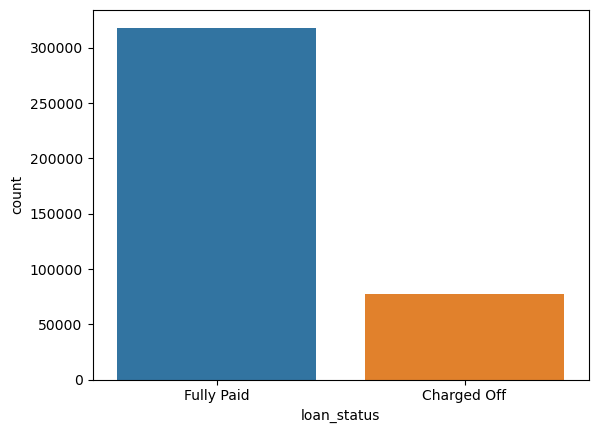

In [11]:
#How much of people paid back(or not) their loans?

sns.countplot(x = "loan_status", data = lending_data)

##### Off the very unbalanced nature of our label, precision and recall would be the metrics to look out for during evaluation

<AxesSubplot:ylabel='Frequency'>

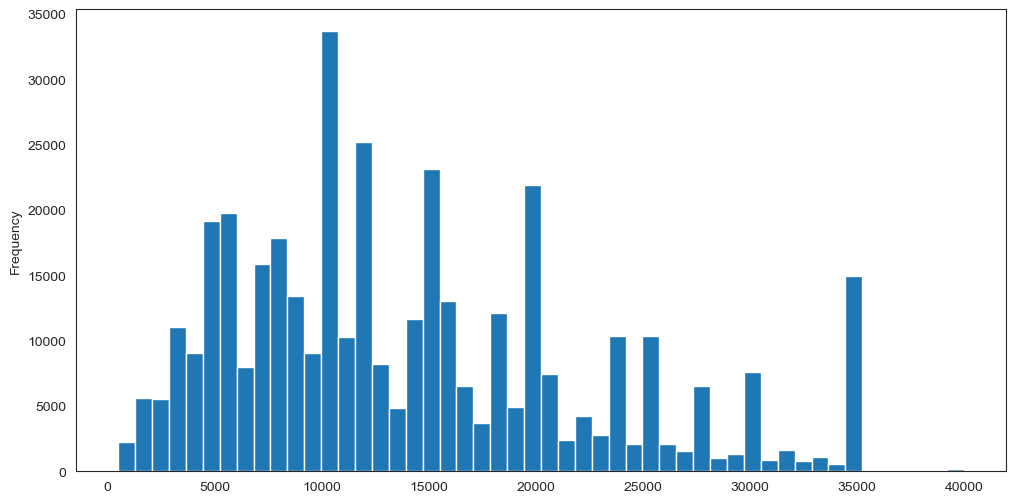

In [12]:
#What range amount of loans are mostly borrowed?

plt.figure(figsize = (12, 6))
sns.set_style("white")
lending_data["loan_amnt"].plot(kind = "hist", bins = 50)

In [13]:
#What is the correlation amongst the features and label?

lending_data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

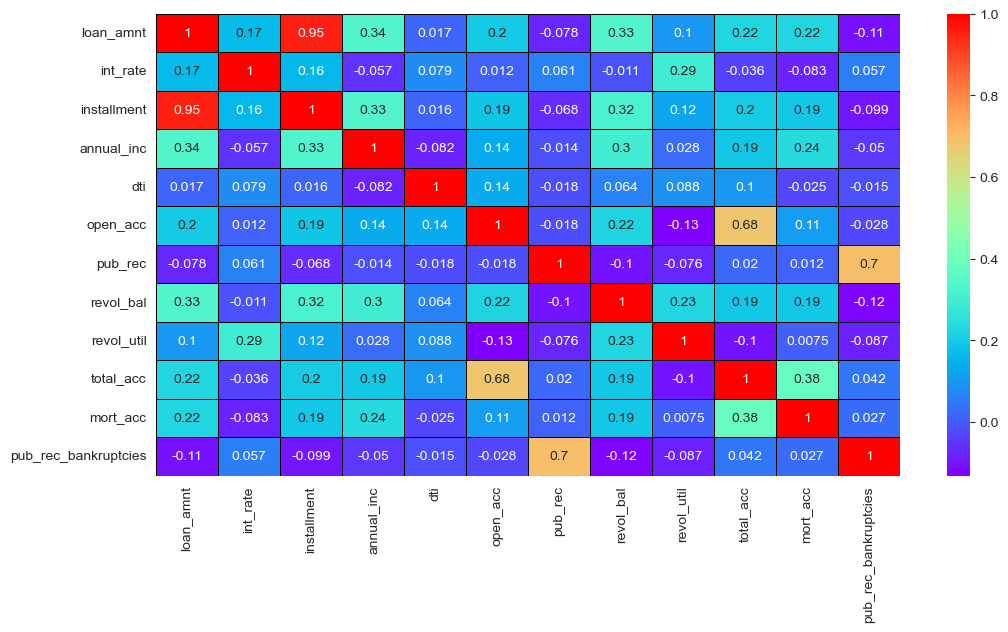

In [14]:
#A visualization of the correlation wouldn't hurt
plt.figure(figsize = (12, 6))
correlation = lending_data.corr()
sns.heatmap(correlation, annot = True, cmap = "rainbow", linewidth = 0.4, linecolor = "black")

##### We observe a very strong correlation between the label (loan_status), and one of the features (installment)
##### Could this be a problem of data leakage or duplicacy?

In [15]:
feature_info("installment")

The monthly payment owed by the borrower if the loan originates.


In [16]:
feature_info("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

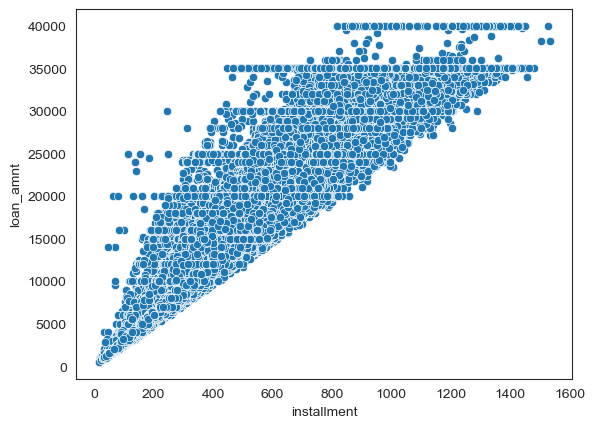

In [17]:
#A deeper look into the relation between these two

sns.scatterplot(x = "installment", y = "loan_amnt", data = lending_data)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

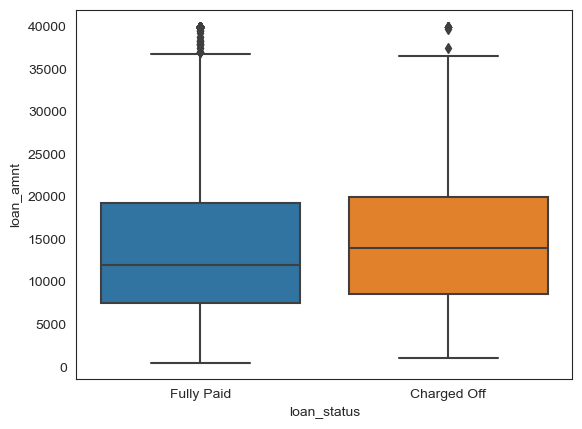

In [18]:
#Let's observe the relationship between loan status and amount

sns.boxplot(x = "loan_status", y = "loan_amnt", data = lending_data)

##### Higher loan amounts are more likely to be charged off but it probably still doesn't give that clear dictator of loan statuses

In [19]:
#Let's see a more quantitative description of what we have is shown in the box plot

lending_data["loan_amnt"].groupby(lending_data["loan_status"]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [20]:
#Let's look into the grades and subgrades assigned to loans

feature_info("grade")
print("\n")
feature_info("sub_grade")

LC assigned loan grade


LC assigned loan subgrade


In [21]:
#How many possible loan grades can a borrower be assigned

print(lending_data["grade"].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [22]:
#How many possible loan subgrades can a borrower be assigned

print(lending_data["sub_grade"].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


<AxesSubplot:xlabel='grade', ylabel='count'>

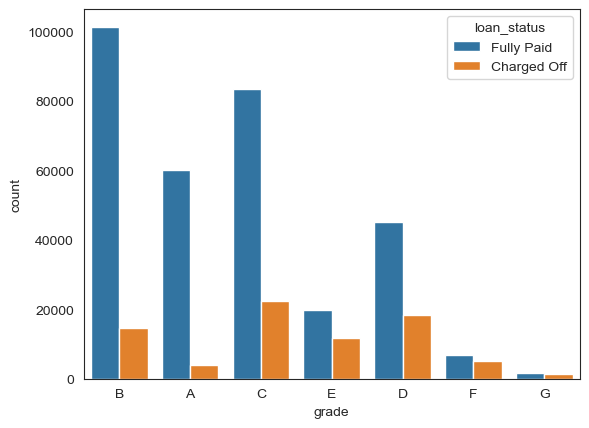

In [23]:
#What grade categories are mostly attained by borrowers?

sns.countplot(x = "grade", data = lending_data, hue = "loan_status")

In [24]:
subgradeorder = sorted(lending_data["sub_grade"].unique())
gradeorder = sorted(lending_data["grade"].unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

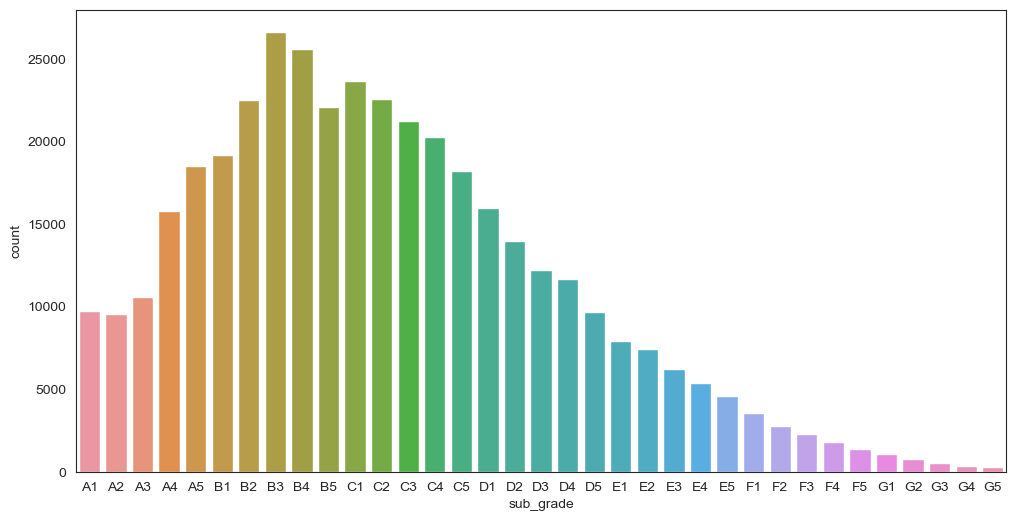

In [25]:
#Visualization of the subgrades in chronological order

plt.figure(figsize = (12, 6))
sns.countplot(x = "sub_grade", data = lending_data, order = subgradeorder)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

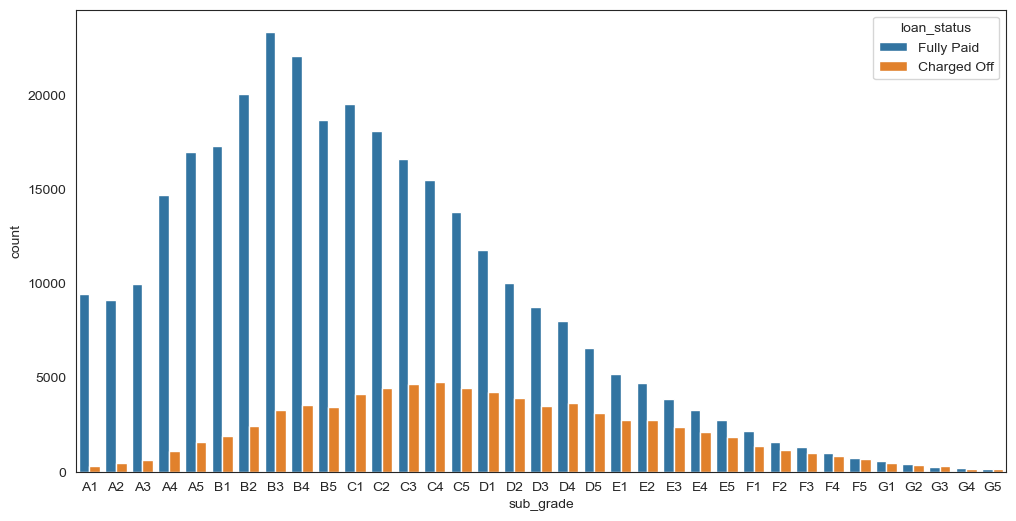

In [26]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "sub_grade", data = lending_data, hue = "loan_status", order = subgradeorder)

In [27]:
#we could zoom in on the lower grades as it looks like they have comparable charged off and fully paid categories

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

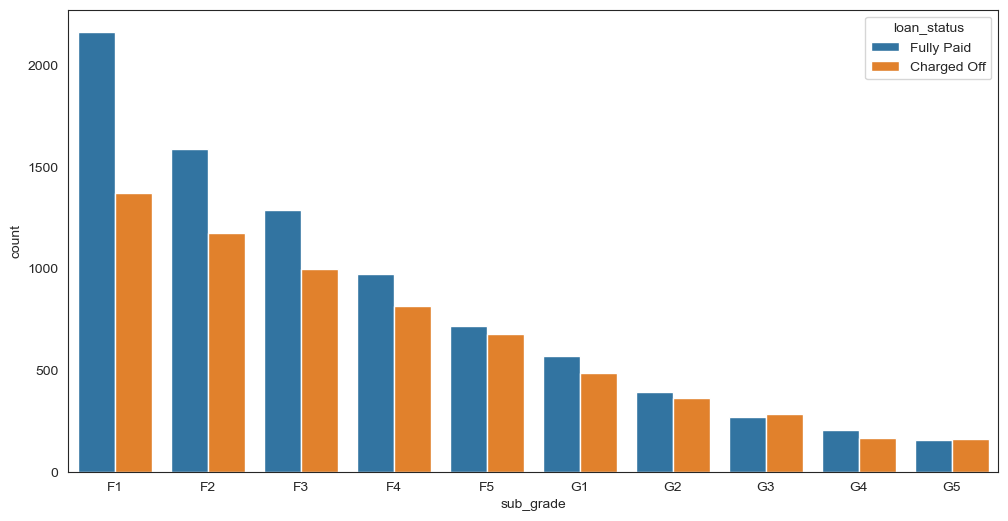

In [28]:
F_and_G_only = sorted(lending_data[(lending_data["grade"] == "F") | (lending_data["grade"] == "G")]["sub_grade"].unique())



plt.figure(figsize = (12, 6))
sns.countplot(x = "sub_grade", data = lending_data, hue = "loan_status", order = (F_and_G_only))

In [29]:
lending_data.select_dtypes(include = "object").columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [30]:
#Convert the label column into a new column of continuous variables

lending_data["loan_repaid"] = lending_data["loan_status"].map({"Fully Paid": 1, "Charged Off": 0})

In [31]:
lending_data[["loan_repaid", "loan_status"]].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [32]:
lending_data.drop("loan_status", axis = 1, inplace = True)

In [33]:
lending_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


<AxesSubplot:>

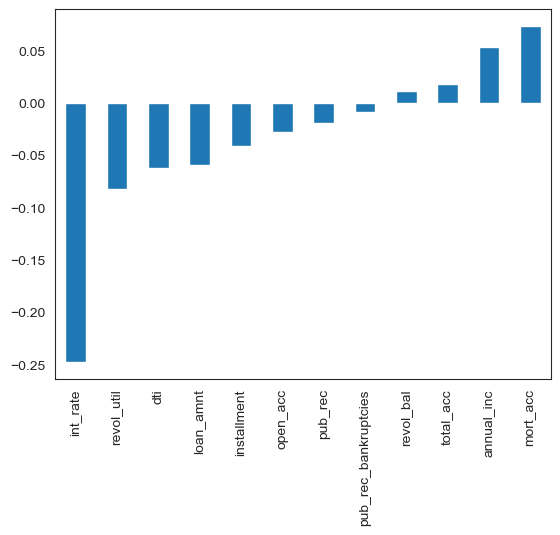

In [34]:
#It is now possible to do a visualization of correlation of the loan repaid column, with other numerical columns

lending_data.corr()["loan_repaid"].sort_values()[:-1].plot(kind = "bar")

In [35]:
len(lending_data)

396030

In [36]:
#Are there null values contained within our data set?

lending_data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [37]:
#Let's express this missing data as a percentage of the total dataset

(lending_data.isnull().sum()/len(lending_data))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [38]:
feature_info("emp_title")
print("\n")
feature_info("emp_length")

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [39]:
#How many unique employment titles are there in?

lending_data["emp_title"].nunique()

173105

In [40]:
lending_data["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [41]:
#It could be difficult to convert the emp_title column into dummies because of the number and counts of its unique values, so maybe better to drop it

lending_data.drop("emp_title", axis = 1, inplace = True)

In [42]:
lending_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [43]:
#Examine the categorical column emp_lenghth

sorted(lending_data["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

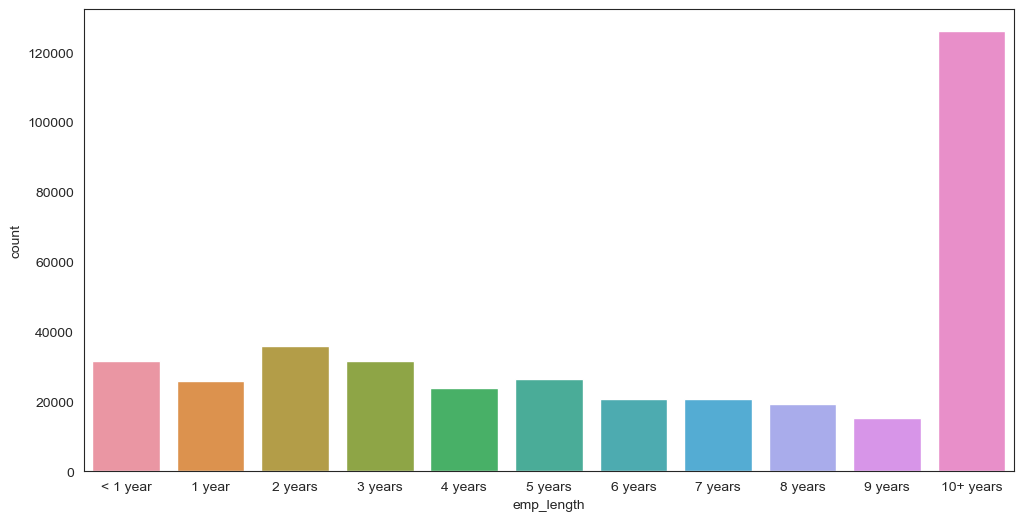

In [44]:
#Based on their employment length, how many people borrow money

order_of_emp_length = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize = (12, 6))
sns.countplot(x = "emp_length", data = lending_data, order = order_of_emp_length)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

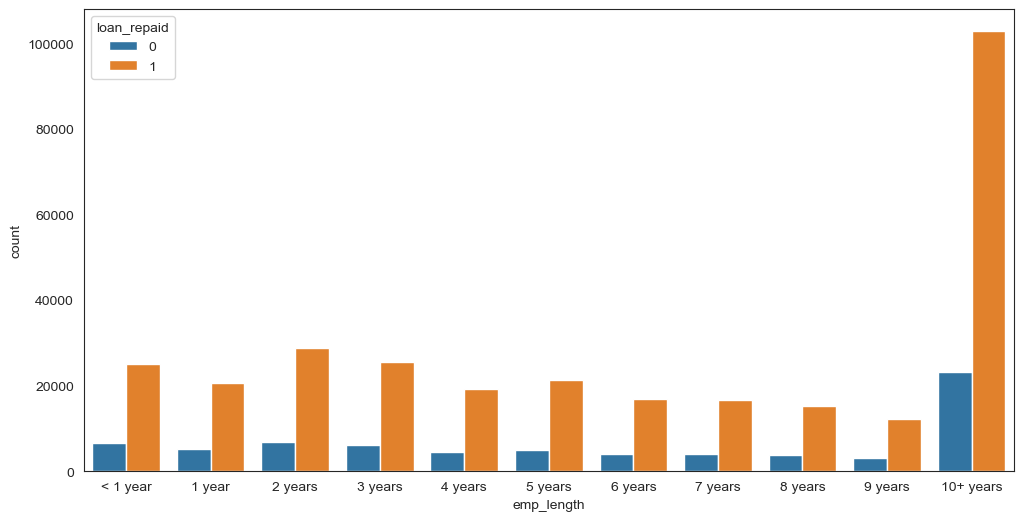

In [45]:
#Categorize these number of people based on whether they paid back their loans or not

plt.figure(figsize = (12, 6))
sns.countplot(x = "emp_length", data = lending_data, order = order_of_emp_length, hue = "loan_repaid")

In [46]:
lending_data["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [47]:
off_per_length = lending_data[lending_data["loan_repaid"] == 0]["emp_length"].value_counts()

In [48]:
paid_per_length = lending_data[lending_data["loan_repaid"] == 1]["emp_length"].value_counts()

In [49]:
#it is possible to get the percentage per employment length category of people that didn't pay their loans

off_per_length/(off_per_length + paid_per_length)

1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: emp_length, dtype: float64

In [50]:
charged_off_percentage = off_per_length/(off_per_length + paid_per_length)

<AxesSubplot:>

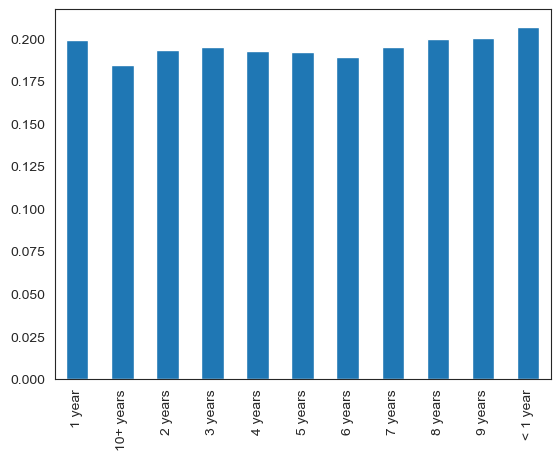

In [51]:
charged_off_percentage.plot(kind = "bar")

In [52]:
#there still isn't no clear show of how the the employment lenght affects the loan status. It could make sense to drop it

In [53]:
lending_data.drop("emp_length", axis = 1,  inplace = True)

In [54]:
lending_data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [55]:
lending_data["title"].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [56]:
 lending_data["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [57]:
#purpose and title columns are similar. It makes sense to drop the title column

In [58]:
lending_data.drop("title", axis = 1, inplace = True)

In [59]:
#What is contained in the categorical column mort_acc

feature_info("mort_acc")

Number of mortgage accounts.


In [60]:
lending_data["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [61]:
lending_data.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [62]:
#mort_acc shows the greatest correlation with total_acc

In [63]:
feature_info("total_acc")

The total number of credit lines currently in the borrower's credit file


In [64]:
#Based on the total_acc, what is the mean of these mort_accs?

lending_data.groupby("total_acc")["mort_acc"].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [65]:
average_of_total_acc = lending_data.groupby("total_acc")["mort_acc"].mean()

In [66]:
average_of_total_acc[4.0]

0.0667433831990794

In [67]:
#Perhaps we could prepare a function that fills in all missing mort_acc values with the average_of_total_acc values

def fill_missing_mortacc(total_acc, mort_acc):
    if np.isnan(mort_acc):   #if mort_acc is missing
        return average_of_total_acc[total_acc]
    else:
        return mort_acc

In [68]:
lending_data["mort_acc"] = lending_data.apply(lambda x: fill_missing_mortacc(x["total_acc"], x["mort_acc"]), axis = 1)

In [69]:
lending_data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

##### The missing data in the columns still containing null data points accounts for very small percentages of the entire data. It could make sense to just drop these negligible missing data points

In [70]:
lending_data.dropna(inplace = True)

In [71]:
lending_data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [72]:
#It is important to identify columns containing string variables

lending_data.select_dtypes(include = "object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [73]:
feature_info("term")

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [74]:
lending_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [75]:
lending_data["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [76]:
#It could make sense to simply convert the string variables into integers of 36 and 60

lending_data["term"] = lending_data["term"].map({" 36 months" : 36, " 60 months" : 60})

In [77]:
lending_data["term"].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [78]:
#Subgrade column already accounts for by the grade column

lending_data.drop("grade", axis = 1, inplace = True)

In [79]:
lending_data["sub_grade"].nunique()

35

In [80]:
#Let's get dummies for the subgrade column

dummies_for_subgrade = pd.get_dummies(lending_data["sub_grade"], drop_first = 1)
lending_data.drop("sub_grade", axis = 1, inplace = True)
lending_data = pd.concat([lending_data, dummies_for_subgrade], axis = 1)

In [81]:
lending_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [82]:
#Check for more string columns

lending_data.select_dtypes(include = "object").columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

##### Convert all columns with few unique values into continuous dummy variables

In [83]:
lending_data["verification_status"].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [84]:
lending_data["application_type"].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [85]:
lending_data["purpose"].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [86]:
lending_data["initial_list_status"].unique()

array(['w', 'f'], dtype=object)

In [87]:
dummies_for_verification_status = pd.get_dummies(lending_data["verification_status"], drop_first = True)
dummies_for_application_type = pd.get_dummies(lending_data["application_type"], drop_first = True)
dummies_for_purpose = pd.get_dummies(lending_data["purpose"], drop_first = True)
dummies_for_initial_list_status = pd.get_dummies(lending_data["initial_list_status"], drop_first = True)

In [88]:
lending_data.drop(["verification_status", "application_type", "purpose", "initial_list_status"], axis = 1, inplace = True)

In [89]:
lending_data = pd.concat([lending_data, dummies_for_verification_status, dummies_for_application_type, dummies_for_purpose, dummies_for_initial_list_status], axis = 1)

In [90]:
lending_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'w'],
      dtype='object')

In [91]:
lending_data.select_dtypes(include = "object").columns

Index(['home_ownership', 'issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [92]:
lending_data["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [93]:
#It could make more sense to merge None and Any into Other, to reduce the number of unique home ownership features

lending_data["home_ownership"] = lending_data["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [94]:
lending_data["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [95]:
dummies_for_home_ownership = pd.get_dummies(lending_data["home_ownership"], drop_first = 1)
lending_data.drop("home_ownership", axis = 1, inplace = True)
lending_data = pd.concat([lending_data, dummies_for_home_ownership], axis = 1)

In [96]:
lending_data["address"].head()

#Could make sense to just extract the zip codes from the address

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [97]:
lending_data["zip_code"] = lending_data["address"].apply(lambda x: x.split(",")[-1][4:])

In [98]:
lending_data["zip_code"].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [99]:
#would have been instrumental to model even perfectly, but for memory issues, is left out

#dummies_for_zip_code = pd.get_dummies(lending_data['zip_code'],drop_first=True)
lending_data.drop(['zip_code','address'],axis=1, inplace = True)
#lending_data = pd.concat([lending_data,dummies_for_zip_code],axis=1)

In [100]:
feature_info("issue_d")

The month which the loan was funded


In [101]:
#It could make more sense to drop the issue_d column, as our model is supposed to be used to decide if a loan will be funded or not. This could be a data leakage problem

lending_data.drop("issue_d", axis = 1, inplace = True)

In [102]:
feature_info("earliest_cr_line")

The month the borrower's earliest reported credit line was opened


In [103]:
lending_data["earliest_cr_line"].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [104]:
#Let's extract the year from the earliestcrline column

lending_data["earlies_cr_year"] = lending_data["earliest_cr_line"].apply(lambda x: int(x.split("-")[-1]))

In [105]:
lending_data["earlies_cr_year"].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earlies_cr_year, dtype: int64

In [106]:
lending_data.drop("earliest_cr_line", axis = 1, inplace = True)

In [107]:
lending_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'w', 'OTHER', 'OWN', 'RENT', 'earlies_cr_year'],
      dtype='object')

In [108]:
lending_data.select_dtypes(include = "object").count()

Series([], dtype: int64)

### Model Development

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X = lending_data.drop("loan_repaid", axis = 1).values

y = lending_data["loan_repaid"].values

In [111]:
print(len(lending_data))

395219


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [113]:
#Let's do some one-hot encoding of the values contained in our dataset

from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler = MinMaxScaler()

In [115]:
X_train = scaler.fit_transform(X_train) #fit train data to avoid data leakage

X_test = scaler.transform(X_test)

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [117]:
model = Sequential()

In [118]:
X_train.shape  #to determine the number of input neurons

(276653, 69)

In [119]:
model.add(Dense(69, activation = "relu"))
model.add(Dropout(0.4))

model.add(Dense(35, activation = "relu"))
model.add(Dropout(0.4))

model.add(Dense(19, activation = "relu"))
model.add(Dropout(0.4))

model.add(Dense(1, activation = "sigmoid"))


model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [120]:
model.fit(x = X_train, y = y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 256, verbose = 1)

Epoch 1/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5300 - val_loss: 0.4602
Epoch 2/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4729 - val_loss: 0.4585
Epoch 3/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4666 - val_loss: 0.4581
Epoch 4/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4635 - val_loss: 0.4581
Epoch 5/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4617 - val_loss: 0.4566
Epoch 6/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4592 - val_loss: 0.4574
Epoch 7/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4579 - val_loss: 0.4571
Epoch 8/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4598 - val_loss: 0.4566
Epoch 9/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4573 - val_loss: 0.4554
Epoch 10/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4581 - val_loss: 0.4553
Epoch 11/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4564 - val_loss: 0.4553
Epoch 12/100
1081/1

1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4530 - val_loss: 0.4518
Epoch 68/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4518 - val_loss: 0.4511
Epoch 69/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4534 - val_loss: 0.4507
Epoch 70/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4514 - val_loss: 0.4504
Epoch 71/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4520 - val_loss: 0.4503
Epoch 72/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4537 - val_loss: 0.4508
Epoch 73/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4526 - val_loss: 0.4508
Epoch 74/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4540 - val_loss: 0.4512
Epoch 75/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4519 - val_loss: 0.4513
Epoch 76/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4491 - val_loss: 0.4512
Epoch 77/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4522 - val_loss: 0.4509
Epoch 78/100
1081/1081 

In [121]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

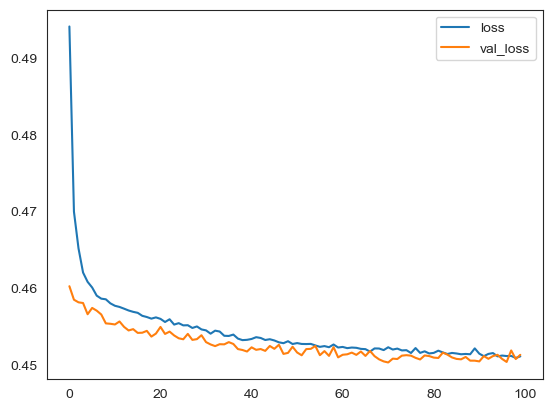

In [122]:
losses[["loss", "val_loss"]].plot()

In [123]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

In [124]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3706/3706 ━━━━━━━━━━━━━━━━━━━━ 3s 710us/step


In [125]:
sklearn.metrics.f1_score(y_test, predictions,average='weighted',zero_division=0)

0.7226986381662315

In [126]:
sklearn.metrics.precision_score(y_test, predictions,average='weighted',zero_division=0)

0.7623075488829494

In [127]:
print(classification_report(y_test, predictions, zero_division = 0))

              precision    recall  f1-score   support

           0       0.59      0.02      0.04     23363
           1       0.81      1.00      0.89     95203

    accuracy                           0.80    118566
   macro avg       0.70      0.51      0.46    118566
weighted avg       0.76      0.80      0.72    118566



In [128]:
print(confusion_matrix(y_test, predictions))

[[  448 22915]
 [  316 94887]]


#### Of course, this isn't the optimum possible model as our recall and f1-score are somewhat poor. Perhaps, there could be need to supply more data (for example the zipcodes), add more hidden layers (or neurons), adjust the epochs, or change the entire algorithm for the task

#### Model Testing

In [129]:
import random
random.seed(50)

random_index = random.randint(0, len(lending_data))

In [130]:
new_prediction = lending_data.drop("loan_repaid", axis = 1).iloc[random_index]

new_prediction

loan_amnt          15500.00
term                  36.00
int_rate              12.99
installment          522.19
annual_inc         75000.00
                     ...   
w                      1.00
OTHER                  0.00
OWN                    0.00
RENT                   1.00
earlies_cr_year     2004.00
Name: 261399, Length: 69, dtype: float64

In [131]:
new_prediction = new_prediction.values
new_prediction = scaler.transform(new_prediction.reshape(1,69))

In [132]:
(model.predict(new_prediction) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1]])

In [133]:
#Now check the original loan repaid status of this random number

lending_data["loan_repaid"].iloc[random_index]

1